In [1]:
!pip install pymongo

In [2]:
# Imports
import bson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
import string
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [3]:
!pip install scikit-surprise

In [4]:
import bson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.sparse import csr_matrix
from surprise import BaselineOnly, SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split as surprise_train_test_split
from surprise import KNNBasic, KNNWithMeans, NMF
from sklearn.neighbors import KNeighborsRegressor
from surprise.model_selection import GridSearchCV
import time


In [5]:
import nltk
import spacy

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Habiba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
!python -m spacy download fr_core_news_sm

     ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
     -- ------------------------------------- 1.0/16.3 MB 5.6 MB/s eta 0:00:03
     ------ --------------------------------- 2.6/16.3 MB 7.6 MB/s eta 0:00:02
     ----------- ---------------------------- 4.7/16.3 MB 8.4 MB/s eta 0:00:02
     ---------------- ----------------------- 6.8/16.3 MB 8.9 MB/s eta 0:00:02
     ---------------------- ----------------- 9.2/16.3 MB 9.4 MB/s eta 0:00:01
     ---------------------------- ----------- 11.5/16.3 MB 9.8 MB/s eta 0:00:01
     ---------------------------------- ----- 13.9/16.3 MB 9.9 MB/s eta 0:00:01
     ---------------------------------------  16.3/16.3 MB 9.9 MB/s eta 0:00:01
     ---------------------------------------- 16.3/16.3 MB 9.7 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [9]:
# Open and read the BSON files
with open("./trictrac/details.bson", "rb") as f:
    details = bson.decode_all(f.read())


with open("./trictrac/infos_scrapping.bson", "rb") as f:
    infos = bson.decode_all(f.read())

with open("./trictrac/jeux.bson", "rb") as f:
    jeux = bson.decode_all(f.read())


with open("./trictrac/avis.bson", "rb") as f:
    avis = bson.decode_all(f.read())

In [202]:
len_details=len(details)
len_jeux=len(jeux)
len_infos=len(infos)
len_avis=len(avis)
print(f"Longeur de chaque table de données avis: {len_avis}, jeux: {len_jeux}, infos: {len_infos}, details : {len_details}")


Longeur de chaque table de données avis: 246524, jeux: 20235, infos: 532, details : 20234


In [235]:
pdDetails = pd.DataFrame(details)
pdJeux = pd.DataFrame(jeux)
pdInfos = pd.DataFrame(infos)
pdAvis = pd.DataFrame(avis)

In [236]:
pdAvis = pd.DataFrame(avis)
print("\nAvis:\n", pdAvis.describe())


Avis:
                note
count  246524.00000
mean        7.59307
std         2.12589
min         0.00000
25%         6.00000
50%         8.00000
75%         9.40000
max        10.00000


In [237]:
pdAvis.head()

,_id,author,date_published,title_review,note,review_href,title,url,treated,comment
0,63c6726ea81f3e3016af9a56,Monsieur Guillaume,2021-01-27 11:06:44,Voyages sur les ailes des papillons,8.0,https://www.trictrac.net/avis/vraiment-bon-12514,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,"Lorsque le jeu est jeu, bon, réflexif, joli po..."
1,63c6726ea81f3e3016af9a57,morlockbob,2020-10-18 10:04:21,le festival de Michoacan,7.0,https://www.trictrac.net/avis/le-festival-de-m...,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,Comment continuer après un mega hit ? Simpleme...
2,63c6726ea81f3e3016af9a58,SwatSh,2021-02-01 08:35:08,Vivez la migration des monarques,7.0,https://www.trictrac.net/avis/vivez-la-migrati...,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,"Vin d'jeu: Avec Mariposas, Elizabeth Hargrave ..."
3,63c6726ea81f3e3016af9a59,Timi JeuxATheme,2020-11-19 17:04:57,Bon,8.0,None,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,NaN
4,63c6726ea81f3e3016af9a5a,prunelles,2021-05-24 12:43:18,Envolez-moi,9.0,https://www.trictrac.net/avis/envolez-moi,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,"Très joli bijou que ce jeu-là ! Le matériel, l..."


In [238]:
print(pdAvis.loc[0, "comment"])  # Affiche le premier commentaire

Lorsque le jeu est jeu, bon, réflexif, joli pour qui est sensible à ce style d'illustration... Lorsque l'on a envie d'y rejouer encore pour essayer autrement, et revivre cette histoire de papillons et de voyages... Et lorsqu'en plus, au détour des règles, on s'intéresse également au propos et à la sensibilisation, légère comme les ailes du dit-papillons et pourtant aussi bien amené, alors effectivement, il y a là un très bon jeu, ludiquement parlant (et il est possible de s'arrêter là) mais également très bon pour l'ouverture des yeux des joueuses et joueurs au monde qui nous entoure... Ça, c'est deux fois bon !


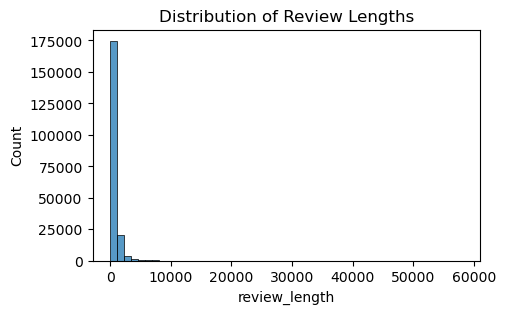

Average review length: 619 characters


In [239]:
pdAvis['review_length'] = pdAvis['comment'].str.len()

plt.figure(figsize=(5, 3))
sns.histplot(data=pdAvis, x='review_length',bins=50)
plt.title('Distribution of Review Lengths')
plt.show()

print(f"Average review length: {pdAvis['review_length'].mean():.0f} characters")

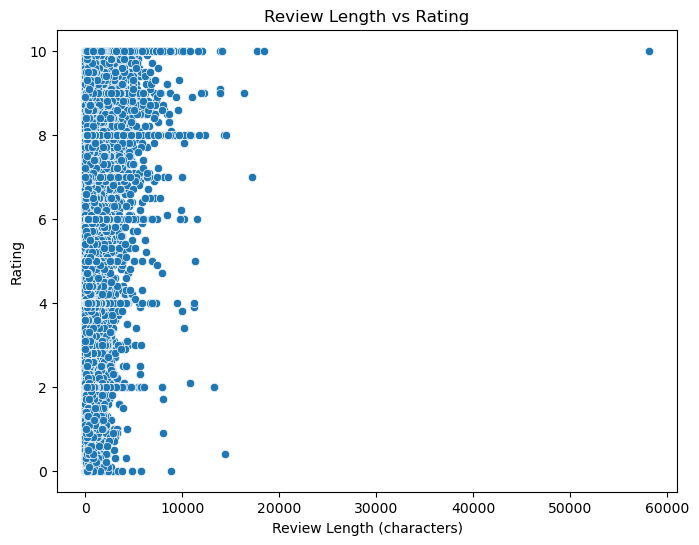

In [240]:
# Analyze if review length correlates with rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pdAvis, x='review_length', y='note')
plt.title('Review Length vs Rating')
plt.xlabel('Review Length (characters)')
plt.ylabel('Rating')
plt.show()

In [241]:
#2 reviews with around 60000 words that arent interesting to keep (they are spam)
pdAvis[pdAvis["review_length"] >50000]

,_id,author,date_published,title_review,note,review_href,title,url,treated,comment,review_length
22193,63c67506993b727dc2a7a3a6,The Lonesome Meeple,2020-04-16 18:24:56,Histoire de Meeples #1 Sub Terra [Partie narra...,10.0,https://www.trictrac.net/avis/sub-terra-partie...,Sub Terra,https://www.trictrac.net/jeu-de-societe/sub-te...,True,Récit à retrouver sur mon blog Histoires de Me...,58097.0
79884,63c6776e993b727dc2a88501,The Lonesome Meeple,2020-04-16 18:24:56,Histoire de Meeples #1 Sub Terra [Partie narra...,10.0,https://www.trictrac.net/avis/sub-terra-partie...,Sub Terra,https://www.trictrac.net/jeu-de-societe/sub-te...,True,Récit à retrouver sur mon blog Histoires de Me...,58097.0


In [242]:
pdAvis[pdAvis["author"]== "The Lonesome Meeple"]

,_id,author,date_published,title_review,note,review_href,title,url,treated,comment,review_length
21474,63c67500993b727dc2a7a0d7,The Lonesome Meeple,2020-04-21 22:32:46,Histoire de Meeples #4 SOS Dino |Partie Narrat...,10.0,https://www.trictrac.net/avis/histoire-de-meep...,SOS DINO,https://www.trictrac.net/jeu-de-societe/sos-di...,True,Récit à retrouver avec photos sur mon blog His...,12044.0
22193,63c67506993b727dc2a7a3a6,The Lonesome Meeple,2020-04-16 18:24:56,Histoire de Meeples #1 Sub Terra [Partie narra...,10.0,https://www.trictrac.net/avis/sub-terra-partie...,Sub Terra,https://www.trictrac.net/jeu-de-societe/sub-te...,True,Récit à retrouver sur mon blog Histoires de Me...,58097.0
79884,63c6776e993b727dc2a88501,The Lonesome Meeple,2020-04-16 18:24:56,Histoire de Meeples #1 Sub Terra [Partie narra...,10.0,https://www.trictrac.net/avis/sub-terra-partie...,Sub Terra,https://www.trictrac.net/jeu-de-societe/sub-te...,True,Récit à retrouver sur mon blog Histoires de Me...,58097.0
84272,63c67799993b727dc2a89625,The Lonesome Meeple,2020-04-21 22:32:46,Histoire de Meeples #4 SOS Dino |Partie Narrat...,10.0,https://www.trictrac.net/avis/histoire-de-meep...,SOS DINO,https://www.trictrac.net/jeu-de-societe/sos-di...,True,Récit à retrouver avec photos sur mon blog His...,12044.0


In [243]:
print(f"Dimensions de pdAvis avant nettoyage : {pdAvis.shape}")

Dimensions de pdAvis avant nettoyage : (246524, 11)


In [244]:
pdAvis=pdAvis[pdAvis["review_length"] != 58097.0]
print(f"Dimensions de pdAvis après nettoyage : {pdAvis.shape}")

Dimensions de pdAvis après nettoyage : (246522, 11)


In [245]:
#enlever les doublons
pdAvis = pdAvis.copy()
print(f"Dimensions de pdAvis avant nettoyage : {pdAvis.shape}")
pdAvis.drop_duplicates(subset=['author', 'date_published', 'title_review', 'note', 'review_href', 'title', 'url', 'treated', 'comment' , 'review_length'], inplace=True)
print(f"Dimensions de pdAvis après nettoyage : {pdAvis.shape}")

Dimensions de pdAvis avant nettoyage : (246522, 11)
Dimensions de pdAvis après nettoyage : (176242, 11)


In [246]:
# Supprimer les lignes où 'comment' est NaN ou vide
pdAvis.dropna(subset=['comment'], inplace=True)
print(f"Dimensions de pdAvis après nettoyage : {pdAvis.shape}")

Dimensions de pdAvis après nettoyage : (150723, 11)


In [247]:
# Optionnel : enlever aussi les commentaires vides (juste espaces)
pdAvis = pdAvis[pdAvis['comment'].str.strip() != ""]
print(f"Dimensions de pdAvis après nettoyage : {pdAvis.shape}")

Dimensions de pdAvis après nettoyage : (142845, 11)


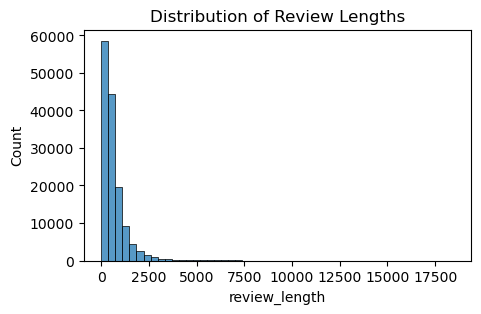

Average review length: 640 characters


In [248]:
#We redid the statistcs about the review length to verify, all is good,the highest review is real
plt.figure(figsize=(5, 3))
sns.histplot(data=pdAvis, x='review_length',bins=50)
plt.title('Distribution of Review Lengths')
plt.show()

print(f"Average review length: {pdAvis['review_length'].mean():.0f} characters")

In [249]:
comment_counts = pdAvis["title"].value_counts()
print(comment_counts)


title
Shogun                                 166
Carcassonne - Die Jäger und Sammler    150
Jeu de Cochons                         148
Dune                                   148
La Città                               148
                                      ... 
Warhammer patrouilles                    1
Praetoria Prima                          1
Thalie                                   1
Jason                                    1
Liar's dice                              1
Name: count, Length: 10341, dtype: int64


In [250]:
# Filtrer les jeux avec au moins 2 commentaires --> Difficile à recommander intelligemment (trop peu d’infos)
print(f"Dimensions de pdAvis avant nettoyage : {pdAvis.shape}")
game_counts = pdAvis['title'].value_counts()
valid_games = game_counts[game_counts >= 2].index
pdAvis = pdAvis[pdAvis['title'].isin(valid_games)]
print(f"Dimensions de pdAvis après nettoyage : {pdAvis.shape}")

Dimensions de pdAvis avant nettoyage : (142845, 11)
Dimensions de pdAvis après nettoyage : (140157, 11)


In [251]:
lis = pdAvis["author"].value_counts()
print(len(lis[lis == 3]))

862


In [28]:
# Filtrer les utilisateurs avec au moins 3 commentaires --> On ne peut pas calculer sa similarité avec d'autres utilisateurs
#on veut que le knn soient trouve des voisins reellement similaires
#print(f"Dimensions de pdAvis avant nettoyage : {pdAvis.shape}")
#user_counts = pdAvis['author'].value_counts()
#valid_users = user_counts[user_counts >= 2].index
#pdAvis = pdAvis[pdAvis['author'].isin(valid_users)]
#print(f"Dimensions de pdAvis après nettoyage : {pdAvis.shape}")

Dimensions de pdAvis avant nettoyage : (140157, 11)
Dimensions de pdAvis après nettoyage : (135605, 11)


In [29]:
def preprocess(text):
    """
    Transforms text to remove unwanted bits.
    """
    punc = string.punctuation
    punc += '\n\r\t'
    text=text.lower()
    text = text.translate(str.maketrans(punc, ' ' * len(punc)))
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\b[a-zA-Z]\b', '', text)  # Supprimer les mots d'une seule lettre
    text = re.sub(r'\b([a-zA-Z])\1{1,}\b', '', text) # Supprimer les mots contenant la même lettre répétée
    return text

In [30]:
import pandas as pd
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Charger les stopwords français + le mot jeu
stop_words = set(stopwords.words("french"))


# Fonction de nettoyage des commentaires
def nettoyer_texte(texte):
    if isinstance(texte, str):  # Vérifier si le texte n'est pas NaN
        texte = texte.lower()  # Convertir en minuscules
        texte = re.sub(r'\W', ' ', texte)  # Supprimer la ponctuation
        texte = re.sub(r'\s+', ' ', texte).strip()  # Supprimer les espaces inutiles
        texte = re.sub(r'\d+', '', texte)
        tokens = texte.split()  # Tokenisation simple
        tokens = [t for t in tokens if t not in stop_words]  # Supprimer les stopwords
        return " ".join(tokens)
    return ""

pdAvis["comment_clean"] = pdAvis["comment"].apply(nettoyer_texte)

print(pdAvis[["comment", "comment_clean"]].head())


                                             comment  \
0  Lorsque le jeu est jeu, bon, réflexif, joli po...   
1  Comment continuer après un mega hit ? Simpleme...   
2  Vin d'jeu: Avec Mariposas, Elizabeth Hargrave ...   
4  Très joli bijou que ce jeu-là ! Le matériel, l...   
5  Mariposas est plutôt beau avec un grand platea...   

                                       comment_clean  
0  lorsque jeu jeu bon réflexif joli sensible sty...  
1  comment continuer après mega hit simplement ap...  
2  vin jeu mariposas elizabeth hargrave parvient ...  
4  très joli bijou jeu là matériel illustrations ...  
5  mariposas plutôt beau grand plateau petits pap...  


In [31]:
nlp = spacy.load('fr_core_news_sm')
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop

def filtrer_commentaire(commentaire):
    doc = nlp(commentaire) #tokenization
    pos_exclues = ['DET', 'CONJ', 'PRON', 'ADP', 'CCONJ', 'PUNCT', 'VERB'] #enlever toutes ces choses (+ verbes)
    mots_filtres = [token.lemma_ for token in doc if token.pos_ not in pos_exclues and token.lemma_ not in fr_stop]
    return ' '.join(mots_filtres)

In [32]:
pdAvis['comment_clean'] = pdAvis['comment'].apply(filtrer_commentaire)

KeyboardInterrupt: 

In [33]:
print(pdAvis[["comment", "comment_clean"]].head())

                                             comment  \
0  Lorsque le jeu est jeu, bon, réflexif, joli po...   
1  Comment continuer après un mega hit ? Simpleme...   
2  Vin d'jeu: Avec Mariposas, Elizabeth Hargrave ...   
4  Très joli bijou que ce jeu-là ! Le matériel, l...   
5  Mariposas est plutôt beau avec un grand platea...   

                                       comment_clean  
0  lorsque jeu jeu bon réflexif joli sensible sty...  
1  comment continuer après mega hit simplement ap...  
2  vin jeu mariposas elizabeth hargrave parvient ...  
4  très joli bijou jeu là matériel illustrations ...  
5  mariposas plutôt beau grand plateau petits pap...  


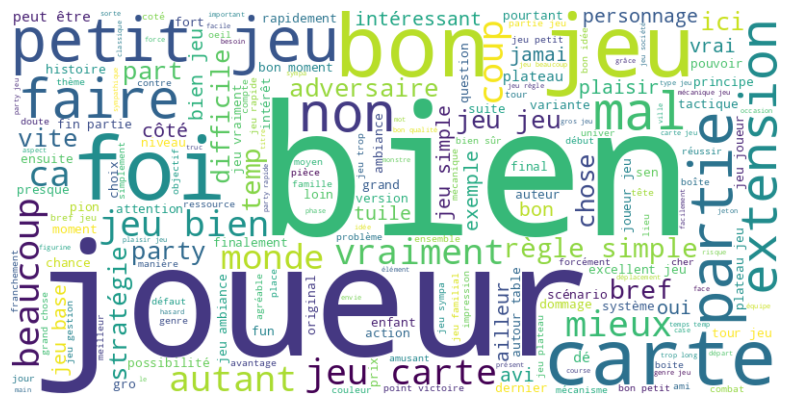

In [31]:
# Concaténer tous les commentaires nettoyés
text = " ".join(pdAvis["comment_clean"])

# Générer le wordcloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Afficher le wordcloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


**meme chose que dans l'autre fichier de la partie 1**

In [36]:
# Imports
import bson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from scipy.sparse import csr_matrix



###################################################################################################



def minipingpong(sparse_matrix, allusers, allgames, min_ratings_users, min_ratings_games, max_iterations=10, plot=True):
    matrix = sparse_matrix.tocoo()
    users = np.array(allusers)
    games = np.array(allgames)
    iteration = 0
    while iteration < max_iterations:
        game_ratings = np.bincount(matrix.col, minlength=len(games))
        user_ratings = np.bincount(matrix.row, minlength=len(users))

        valid_games = np.where(game_ratings >= min_ratings_games)[0]

        valid_users = np.where(user_ratings >= min_ratings_users)[0]

        keep = np.isin(matrix.row, valid_users) & np.isin(matrix.col, valid_games)

        new_row = matrix.row[keep]
        new_col = matrix.col[keep]
        new_data = matrix.data[keep]

        # Update row and column indices to match new dimensions
        row_mapping = {old: new for new, old in enumerate(valid_users)}
        col_mapping = {old: new for new, old in enumerate(valid_games)}

        new_row = np.array([row_mapping[r] for r in new_row])
        new_col = np.array([col_mapping[c] for c in new_col])

        # Create the new matrix
        matrix = csr_matrix((new_data, (new_row, new_col)),
                           shape=(len(valid_users), len(valid_games)))
        # Convert back to COO for next iteration
        matrix = matrix.tocoo()

        # Update user and game lists
        users = users[valid_users]
        games = games[valid_games]
        iteration += 1

    final_matrix = matrix.tocsr()

    return final_matrix

###################################################################################################


def subtract_mean(cleaned_matrix):
    data_array = cleaned_matrix.toarray()

    user_means = []
    for i in range(data_array.shape[0]):
        user_ratings = data_array[i, :]
        non_zero_indices = user_ratings != 0
        user_ratings_non_zero = user_ratings[non_zero_indices]

        if len(user_ratings_non_zero) > 0:
            user_means.append(user_ratings_non_zero.mean())
        else:
            user_means.append(0)

    # Create a new matrix with normalized ratings
    normalized_data = []
    normalized_rows = []
    normalized_cols = []

    cleaned_matrix_coo = cleaned_matrix.tocoo()
    # For each non-zero entry in the original matrix, subtract user mean
    for i, j, v in zip(cleaned_matrix_coo.row, cleaned_matrix_coo.col, cleaned_matrix_coo.data):
        normalized_value = v - user_means[i]
        normalized_data.append(normalized_value)
        normalized_rows.append(i)
        normalized_cols.append(j)

    # Create new sparse matrix with normalized values
    normalized_matrix = csr_matrix(
        (normalized_data, (normalized_rows, normalized_cols)),
        shape=cleaned_matrix.shape
    )
    return normalized_matrix


###################################################################################################

def custom_train_test_split(sparse_matrix, test_size=0.2, max_user_loss=0.5, max_game_loss=0.5):

    np.random.seed(42)

    coo_matrix = sparse_matrix.tocoo()

    # Total number of ratings
    n_ratings = coo_matrix.data.size
    n_users = sparse_matrix.shape[0]
    n_games = sparse_matrix.shape[1]

    # Count ratings per user and per game
    user_ratings = np.bincount(coo_matrix.row, minlength=n_users)
    game_ratings = np.bincount(coo_matrix.col, minlength=n_games)

    # Calculate maximum allowed test ratings per user and game
    max_test_per_user = np.floor(user_ratings * max_user_loss).astype(int)
    max_test_per_game = np.floor(game_ratings * max_game_loss).astype(int)

    # Initialize counters for test ratings per user and game
    test_per_user = np.zeros(n_users, dtype=int)
    test_per_game = np.zeros(n_games, dtype=int)

    # Create a random permutation of rating indices
    rating_indices = np.random.permutation(n_ratings)

    # Initialize train and test masks
    train_mask = np.ones(n_ratings, dtype=bool)
    test_mask = np.zeros(n_ratings, dtype=bool)

    # Target number of test ratings
    n_test_target = int(test_size * n_ratings)
    n_test_selected = 0

    # Iterate through ratings in random order
    for idx in rating_indices:
        user = coo_matrix.row[idx]
        game = coo_matrix.col[idx]

        # Check if we can add this rating to test set without violating constraints
        if (test_per_user[user] < max_test_per_user[user] and
            test_per_game[game] < max_test_per_game[game] and
            n_test_selected < n_test_target):

            # Add to test set
            train_mask[idx] = False
            test_mask[idx] = True

            # Update counters
            test_per_user[user] += 1
            test_per_game[game] += 1
            n_test_selected += 1

    # Create train and test matrices
    train_matrix = csr_matrix(
        (coo_matrix.data[train_mask],
         (coo_matrix.row[train_mask], coo_matrix.col[train_mask])),
        shape=sparse_matrix.shape
    )

    test_matrix = csr_matrix(
        (coo_matrix.data[test_mask],
         (coo_matrix.row[test_mask], coo_matrix.col[test_mask])),
        shape=sparse_matrix.shape
    )

    # Print statistics
    print(f"Split complete: {n_test_selected} ratings ({n_test_selected/n_ratings:.2%}) in test set")
    print(f"Train set: {train_matrix.nnz} ratings, Test set: {test_matrix.nnz} ratings")

    # Check if any users or games lost too many ratings
    users_with_ratings = np.where(user_ratings > 0)[0]
    games_with_ratings = np.where(game_ratings > 0)[0]

    max_user_loss_actual = np.max(test_per_user[users_with_ratings] / user_ratings[users_with_ratings])
    max_game_loss_actual = np.max(test_per_game[games_with_ratings] / game_ratings[games_with_ratings])

    print(f"Maximum user ratings loss: {max_user_loss_actual:.2%}")
    print(f"Maximum game ratings loss: {max_game_loss_actual:.2%}")

    return train_matrix, test_matrix, train_mask, test_mask

##################################################################################################################################################################

#Baseline models


# Model 1: Global Mean Baseline
def global_mean_baseline(train_matrix,test_matrix):
    """Simplest baseline: predict global mean rating for all users and items"""
    global_mean = train_matrix.data.mean()
    test_rows, test_cols = test_matrix.nonzero()

    # For evaluating on test data
    predictions = np.full_like(test_matrix.data, global_mean)

    rmse = np.sqrt(mean_squared_error(predictions, test_matrix.data))
    mae = mean_absolute_error(predictions, test_matrix.data)
    r2 = r2_score(predictions, test_matrix.data)

    print(f"Global Mean Baseline: RMSE = {rmse:.4f}, MAE = {mae:.4f}")
    return global_mean, rmse, mae , r2


# Model 2: User Mean Baseline
def user_mean_baseline(train_matrix, test_matrix):
    # Get user means from training data
    n_users = train_matrix.shape[0]
    test_rows, test_cols = test_matrix.nonzero()

    # Calculate mean rating for each user (row)
    user_means = np.zeros(n_users)
    for u in range(n_users):
        row = train_matrix.getrow(u)
        if row.nnz > 0:  # If user has any ratings
            user_means[u] = row.data.mean()

    # Make sure test_rows values are within bounds
    valid_indices = [i for i, row in enumerate(test_rows) if row < n_users]

    if len(valid_indices) < len(test_rows):
        print(f"Warning: {len(test_rows) - len(valid_indices)} test entries had out-of-bounds user indices")

    # Use only valid indices
    test_rows_valid = test_rows[valid_indices]
    test_cols_valid = test_cols[valid_indices]
    test_data_valid = test_matrix.data[valid_indices]

    # Make predictions for test data
    predictions = np.array([user_means[row] for row in test_rows_valid])

    # Ensure predictions and test data have same length
    assert len(predictions) == len(test_data_valid), "Predictions and test data must have same length"

    rmse = np.sqrt(mean_squared_error(predictions, test_data_valid))
    mae = mean_absolute_error(predictions, test_data_valid)
    r2 = r2_score(predictions,test_data_valid )

    print(f"User Mean Baseline: RMSE = {rmse:.4f}, MAE = {mae:.4f}")
    return user_means, rmse, mae, r2

# Model 3: Game Mean Baseline
def item_mean_baseline(train_matrix, test_matrix):
    # Calculate mean rating for each item/game (column)
    n_items = train_matrix.shape[1]
    item_means = np.zeros(n_items)
    test_rows, test_cols = test_matrix.nonzero()

    # Get mean of each column (item), accounting for sparsity
    for i in range(n_items):
        col = train_matrix.getcol(i)
        if col.nnz > 0:  # If item has any ratings
            item_means[i] = col.data.mean()

    # Make sure test_cols values are within bounds
    valid_indices = [i for i, col in enumerate(test_cols) if col < n_items]

    if len(valid_indices) < len(test_cols):
        print(f"Warning: {len(test_cols) - len(valid_indices)} test entries had out-of-bounds item indices")

    # Use only valid indices
    test_rows_valid = test_rows[valid_indices]
    test_cols_valid = test_cols[valid_indices]
    test_data_valid = test_matrix.data[valid_indices]

    # Make predictions for test data
    predictions = np.array([item_means[col] for col in test_cols_valid])

    # Ensure predictions and test data have same length
    assert len(predictions) == len(test_data_valid), "Predictions and test data must have same length"

    rmse = np.sqrt(mean_squared_error(predictions, test_data_valid))
    mae = mean_absolute_error(predictions, test_data_valid)
    r2 = r2_score(predictions, test_data_valid)

    print(f"Item Mean Baseline: RMSE = {rmse:.4f}, MAE = {mae:.4f}")
    return item_means, rmse, mae, r2

In [37]:
pdAvis['review_length'] = pdAvis['comment'].str.len()
pdAvis=pdAvis[pdAvis["review_length"] != 58097.0]

#Duplicates removable
pdAvis.drop_duplicates(subset=['author','title_review','note','title','comment'], inplace=True)
pdJeux.drop_duplicates(subset=['title',	'href','avis'], inplace=True)


allgames = sorted(pdJeux["title"].unique())
allusers = sorted(pdAvis['author'].unique())


# Création de la dataFrame
ratings_matrix = pd.DataFrame(
    index=allusers,
    columns=allgames,
    dtype=float
)

# Remplissage de la matrice avec les notes
for _, row in pdAvis.iterrows():
    ratings_matrix.at[row['author'], row['title']] = row['note']

# Conversion en matrice sparse
mask = ~ratings_matrix.isna()
sparse_ratings_matrix = csr_matrix(
    (
        ratings_matrix.values[mask],
        np.where(mask)
    ),
    shape=ratings_matrix.shape
)

# Remove users and games with with low numbers of ratings the optimal value found was (14,18)
cleaned_matrix = minipingpong(sparse_ratings_matrix, allusers, allgames, 14, 18)

In [38]:
# Convert the cleaned_matrix data to Surprise format
ratings_list = []
for i, j in zip(*cleaned_matrix.nonzero()):
    user = allusers[i]
    game = allgames[j]
    rating = cleaned_matrix[i, j]
    ratings_list.append((user, game, rating))


ratings_df = pd.DataFrame(ratings_list, columns=['userID', 'itemID', 'rating'])

# Define the reader with appropriate rating scale
reader = Reader(rating_scale=(0, 10))

# Create a Surprise dataset
data = Dataset.load_from_df(ratings_df, reader)
trainset, testset = surprise_train_test_split(data, test_size=0.2, random_state=42)



knn_basic = KNNBasic(k=50, sim_options={'name': 'pearson', 'user_based': True}) # After testing 40 was the best k neighbors found
knn_means = KNNWithMeans(k=50, sim_options={'name': 'pearson', 'user_based': True})


knn_basic.fit(trainset)
knn_means.fit(trainset)


preds_basic = knn_basic.test(testset)
preds_means = knn_means.test(testset)

rmse_knn_basic = accuracy.rmse(preds_basic)
mae_knn_basic = accuracy.mae(preds_basic)
rmse_knn_means = accuracy.rmse(preds_means)
mae_knn_means = accuracy.mae(preds_means)
y_true = [pred.r_ui for pred in preds_basic]
y_pred_basic = [pred.est for pred in preds_basic]
y_pred_means = [pred.est for pred in preds_means]
r2_knn_basic = r2_score(y_true, y_pred_basic)
r2_knn_means = r2_score(y_true, y_pred_means)


knn_results = pd.DataFrame({
    'Model': ['KNNBasic (Suprise)', 'KNNWithMeans (Suprise)'],
    'RMSE': [rmse_knn_basic, rmse_knn_means],
    'MAE': [mae_knn_basic, mae_knn_means],
    'R2 score': [r2_knn_basic, r2_knn_means]
})

# Combine with previous results
results = knn_results

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.9802
MAE:  1.5614
RMSE: 1.9047
MAE:  1.4755


**j'ai fait juste cette fonction pour retourner les top predictions pour chaque utilisateurs (on pourrait juste ajouter cette fonction dans l'autre fichier de la partie knn**

In [71]:
def get_top_n_predictions(predictions, n=10):
    """
    Return the top-N recommended items for each user from a set of predictions.
    """

    # First map the predictions to each user.
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if uid not in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the N highest ones.
    #on trie les items recommandés par note prédite (la plus élevée en premier) et on garde les n premiers jeux.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [125]:
top_n = get_top_n_predictions(preds_means, n=5)

In [126]:
# Print the recommended items for the first couple of users
first_couple_users = list(top_n.keys())[:20]  # Adjust the number to select the first N users

for uid in first_couple_users:
    user_ratings = top_n[uid]
    print(f"Recommendations for user {uid}: {[iid for (iid, _) in user_ratings]}")

Recommendations for user Bloublou: ['Aladdin et le tapis volant', 'ASL : Starter Kit  #3', 'Antagon', 'Apache']
Recommendations for user GrayVice: ['Aladin', 'Bataille corse', 'Austerlitz 1805 - Partie Sud', 'Batameuh', 'Babylon 5 Component Game System : Core Sets']
Recommendations for user Dedal: ["Batt'l Kha'os", 'A Touch of Evil : The Allies', 'Bataflash', 'Battletech Technical Readout 3050', 'Battle-cry']
Recommendations for user Amarante: ['Atlantis Rising', 'A4', 'Banking', 'Age of Steam : Expansions France & Italy', 'Atlanteon']
Recommendations for user Geoff: ['Airpoly', 'African Queen', 'Banana Jump', '7 Fallen', 'Badaboum !']
Recommendations for user CCCP: ['Atlantis Rising', '7 wonders : Louis', 'Arche Extra Mix', 'Army of Darkness Card Game : Hail to the King', 'Barbarians of Lemuria']
Recommendations for user Bubu_: ['ASL : Croix de Guerre', 'ASL : Kampfgruppe Peiper II', 'Alsace', "Age of Empires III : L'âge des découvertes", 'Aspern-Essling']
Recommendations for user Gwe

# **extraire pour un jeu (Shogun) et un utilisateur (sheewi) ses voisins et leurs comentaires**

In [267]:
#from surprise.prediction_algorithms.knns import KNNWithZScore

reader = Reader(rating_scale=(1, 10))  # Assuming rating scale is from 1 to 10
dataa = Dataset.load_from_df(pdAvis[['author', 'title', 'note']], reader)
trainset2 = dataa.build_full_trainset()
knn_means = KNNWithMeans(sim_options={'name': 'pearson', 'user_based': True}, k=50, min_k=1)
knn_means.fit(trainset2)

def get_neighbors(user_name, game_title, k=50):
    # Retrieve inner ID of the user
    user_inner_id = trainset2.to_inner_uid(user_name)
    
    # Retrieve inner ID of the game
    try:
        game_inner_id = trainset2.to_inner_iid(game_title)
    except ValueError:
        return f"No data available for the game '{game_title}'."
    
    # Retrieve the k nearest neighbors of the user
    neighbors = knn_means.get_neighbors(user_inner_id, k)
    # Convert inner IDs of the neighbors back to raw IDs
    neighbors_ids = [trainset2.to_raw_uid(inner_id) for inner_id in neighbors]
    print(neighbors_ids)
    # Filter the dataset to find the neighbors who have rated the specified game
    filtered_comments = pdAvis[(pdAvis['author'].isin(neighbors_ids)) & (pdAvis['title'] == game_title)]
    print("Nombre de voisins ayant commenté ce jeu :", len(filtered_comments))
    
    
    # Collect and return usernames and their comments on the specified game
    return filtered_comments[['author', 'note', 'comment']].values.tolist()

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [268]:
neighbors_comments = get_neighbors('sheewi', 'Shogun', k=50)

['Yzarc', 'limp', 'ijonesjeux', 'morlockbob', 'Pac', 'PtitJu', 'cmsy', 'samuel2277', 'Sicander vincit', 'PROPHETTE', 'pepetteuh', 'Atanaheim', 'rugal', 'starvince', 'voxmetalis', 'RickyPimous', 'serraangel', 'Monsieur Guillaume', 'SwatSh', 'prunelles', 'BSI40', 'kakawette', 'axelian73', 'MisTeR ToON', 'Lilly', 'letroyenfou', 'Tostaky37', 'Empédocle', 'lenantaisdemontelimar', 'AtomChris', 'Ricardo31', 'Player One', 'expliquemoica', 'koala von koala', 'Madame Mathilde', 'Antoinette', 'le.meeple.jaune', 'grotesk', 'Jones', 'bunnypookah', 'Greta', 'Hagrael', 'zeibacker', 'boscouzareix', 'John Lénine', 'AkoaTujou', 'PapaJeux', 'El Lorenzo207', 'plumesdanges', 'Didi5962']
Nombre de voisins ayant commenté ce jeu : 12


In [264]:
for cmt in neighbors_comments:
    print(cmt)
    print()

['PtitJu', 8.0, 'Les + :Le matériel (dont un plateau réversible)Le principe de la tourRiches des mécanismes (ordre du tour, programmation (avec connaissance des 5 premières actions jouées), résolution des combats (la tour), révolte, gestion de ses provinces, ses coffres et du riz, …)Les - : Erreurs dans la règle en françaisMise en place un peu longue (et pas sur n’importe quelle table !)Seulement 6 tours mais 2 heures quand mêmeDonc : Je préfère le hasard de la tour de Shogun aux lancers de dés d’Invasions.En tout cas, on ne voit pas le temps passer.']

['limp', 8.0, "Difficile de trancher vraiment sur ce jeu, quoi que, je m'y essaie.Shogun est un très bon jeu, c'est indéniable.Shogun n'est pas aussi compliqué qu'il y parait non plus. Pour autant, il est riche, et les choix à faire seront nombreux.Le hasard des combats est une véritable trouvaille, aussi bien dans la réalisation de la tour que dans le mécanisme lui-même. Ca permettra d'ajouter du fun et un peu de tension aux parties.On

In [256]:
pdAvis["title"].value_counts()

title
Shogun                                  166
Carcassonne - Die Jäger und Sammler     150
ARENA - Roma II                         148
La Città                                148
Jeu de Cochons                          148
                                       ... 
Kapitän Wackelpudding                     2
Dobble Beach                              2
Haut les cubes !                          2
Voldétour extension                       2
Last Night On Earth : Zombie Pillage      2
Name: count, Length: 7653, dtype: int64

In [233]:
pdAvis[(pdAvis["title"]== "Shogun")]

,_id,author,date_published,title_review,note,review_href,title,url,treated,comment,review_length
200018,63c67f37993b727dc2aa5a47,PtitJu,2008-01-22 12:28:48,J’ai un faible pour le pays du soleil levant,8.0,https://www.trictrac.net/avis/j-ai-un-faible-p...,Shogun,https://www.trictrac.net/jeu-de-societe/shogun...,True,Les + :Le matériel (dont un plateau réversible...,539.0
200019,63c67f37993b727dc2aa5a48,Guyomar,2007-02-13 12:28:45,Mes paysans dans ma gueule...,10.0,https://www.trictrac.net/avis/mes-paysans-dans...,Shogun,https://www.trictrac.net/jeu-de-societe/shogun...,True,J'avais beaucoup apprécié Wallenstein et ce n'...,494.0
200020,63c67f37993b727dc2aa5a49,limp,2011-03-27 12:29:00,Espagne 1 Japon 0,8.0,https://www.trictrac.net/avis/espagne-1-japon-0,Shogun,https://www.trictrac.net/jeu-de-societe/shogun...,True,"Difficile de trancher vraiment sur ce jeu, quo...",1016.0
200021,63c67f37993b727dc2aa5a4a,ybkam,2007-12-08 12:28:48,Soleil d'orient,10.0,https://www.trictrac.net/avis/soleil-d-orient,Shogun,https://www.trictrac.net/jeu-de-societe/shogun...,True,"Bon, c'est une splendeur, un vrai plaisir à ch...",732.0
200022,63c67f37993b727dc2aa5a4b,Harry Cover,2010-09-17 12:28:57,Un jeu (de riz) complet !,10.0,https://www.trictrac.net/avis/un-jeu-de-riz-co...,Shogun,https://www.trictrac.net/jeu-de-societe/shogun...,True,"Conquête, Combat, Développement, Programmation...",799.0
...,...,...,...,...,...,...,...,...,...,...,...
233256,63c682c8993b727dc2aadc1d,R2,2006-09-13 12:28:43,Oui mais...,6.0,https://www.trictrac.net/avis/oui-mais-43,Shogun,https://www.trictrac.net/jeu-de-societe/shogun...,True,J'aime les jeux avec du beau matériel qui débo...,1173.0
233257,63c682c8993b727dc2aadc1e,crashphil,2006-08-17 12:28:43,Un monstre très jouable,7.0,https://www.trictrac.net/avis/un-monstre-tres-...,Shogun,https://www.trictrac.net/jeu-de-societe/shogun...,True,J'ai acheté cette impressionnante boîte lors d...,774.0
233258,63c682c8993b727dc2aadc1f,zapata,2006-01-30 12:28:41,Honorable étranger...,6.0,https://www.trictrac.net/avis/honorable-etranger,Shogun,https://www.trictrac.net/jeu-de-societe/shogun...,True,"Il y a 15 ans, ça me bottait bien. ces bons gr...",558.0
233259,63c682c8993b727dc2aadc20,BananeDC,2009-05-01 12:28:53,Un must ABSOLU,10.0,https://www.trictrac.net/avis/un-must-absolu-0,Shogun,https://www.trictrac.net/jeu-de-societe/shogun...,True,En 1986 sortait Shogun(réédité en 1995 sous le...,4812.0


# **utilisation du llm ollama : llama**

In [281]:
import requests

def ask_ollama(prompt):
    response = requests.post(
        "http://localhost:11434/api/generate",
        json={"model": "llama3.2:latest", "prompt": prompt, "stream": False}
    )
    #print(response.json())
    return response.json()["response"]


In [317]:
def expliquer_recommandation(user_name, nom_jeu, commentaires_voisins_pos, commentaires_voisins_neg):
    prompt = f"""
    Tu es un assistant de recommandation de jeux de société.
    En te basant sur les commentaires positifs (avec une note strictement supérieure à 6 et les autres) d'utilisateurs proches, explique pourquoi le jeu "{nom_jeu}" pourrait plaire à l'utilisateur "{user_name}" :
    {"; ".join(commentaires_voisins_pos)}
    {"; ".join(commentaires_voisins_neg)}
    
    Utilise un ton naturel et convaincant, mais ne parle pas à la première personne. La réponse doit être concise et directe.
    """
    return ask_ollama(prompt)


In [320]:
def synthese_recommandation_ollama(user_name, nom_jeu, commentaires_proches_pos, commentaires_proches_neg, commentaires_lointains_pos, commentaires_lointains_neg):
    prompt = f"""
    Tu es un assistant de recommandation de jeux de société.
    En te basant sur les commentaires ci-dessous, explique pourquoi le jeu "{nom_jeu}" pourrait plaire à l'utilisateur "{user_name}". 
    - Les **utilisateurs proches** de {user_name} ayant **bien noté** le jeu (note > 6) ont dit :
    {'; '.join(commentaires_proches_pos)}
    - Les **utilisateurs proches** de {user_name} ayant **mal noté** le jeu (note ≤ 6) ont dit :
    {'; '.join(commentaires_proches_neg)}
    - Les **utilisateurs éloignés** ayant bien noté le jeu :
    {'; '.join(commentaires_lointains_pos)}
    - Les **utilisateurs éloignés** ayant mal noté le jeu :
    {'; '.join(commentaires_lointains_neg)}
    
    Rédige une **explication naturelle, concise, et convaincante** qui met l’accent sur ce que les utilisateurs proches ont aimé dans le jeu. Mentionne aussi les points de divergence si pertinent, mais l’objectif est d’expliquer **pourquoi cela pourrait plaire à {user_name}**.
     Ne parle pas à la première personne et fait comme si tu parles à ce joueur.
    """

    return ask_ollama(prompt)

In [298]:
def get_comments_voisins(user_name, game_title, k=50 , seuil=6):
    voisins_data = get_neighbors(user_name, game_title, k)
    # Extraire seulement les commentaires dont la note est au moins égale au seuil
    commentaires_pos = [comment for _, note, comment in voisins_data if note > seuil]
    # Extraire seulement les commentaires dont la note est plus petit que le seuil
    commentaires_neg = [comment for _, note, comment in voisins_data if note <= seuil]
    return commentaires_pos, commentaires_neg


In [297]:
commentaires_voisins_pos, commentaires_voisins_neg = get_comments_voisins("sheewi", "Shogun", seuil = 7)
print(len(commentaires_voisins_pos))
print(len(commentaires_voisins_neg))

['Yzarc', 'limp', 'ijonesjeux', 'morlockbob', 'Pac', 'PtitJu', 'cmsy', 'samuel2277', 'Sicander vincit', 'PROPHETTE', 'pepetteuh', 'Atanaheim', 'rugal', 'starvince', 'voxmetalis', 'RickyPimous', 'serraangel', 'Monsieur Guillaume', 'SwatSh', 'prunelles', 'BSI40', 'kakawette', 'axelian73', 'MisTeR ToON', 'Lilly', 'letroyenfou', 'Tostaky37', 'Empédocle', 'lenantaisdemontelimar', 'AtomChris', 'Ricardo31', 'Player One', 'expliquemoica', 'koala von koala', 'Madame Mathilde', 'Antoinette', 'le.meeple.jaune', 'grotesk', 'Jones', 'bunnypookah', 'Greta', 'Hagrael', 'zeibacker', 'boscouzareix', 'John Lénine', 'AkoaTujou', 'PapaJeux', 'El Lorenzo207', 'plumesdanges', 'Didi5962']
Nombre de voisins ayant commenté ce jeu : 12
11
1


In [310]:
def get_distant_users_comments(user_name, game_title, k=50, seuil=6):
    # 1. Récupérer tous les utilisateurs
    all_users = set(pdAvis['author'].unique())
    
    # 2. Obtenir les voisins proches
    try:
        user_inner_id = trainset2.to_inner_uid(user_name)
        neighbor_inner_ids = knn_means.get_neighbors(user_inner_id, k)
        neighbors = set([trainset2.to_raw_uid(inner_id) for inner_id in neighbor_inner_ids])
    except ValueError:
        print(f"L'utilisateur {user_name} n'est pas dans le trainset.")
        return []
    
    # 3. Trouver les utilisateurs éloignés
    distant_users = all_users - neighbors - {user_name}
    
    # 4. Filtrer les commentaires de ces utilisateurs pour le jeu donné
    distant_comments = pdAvis[
        (pdAvis['author'].isin(distant_users)) &
        (pdAvis['title'] == game_title) &
        (pdAvis['comment'].notnull())
    ]

    # Positifs et negatifs comments 
    pos = distant_comments[distant_comments["note"] > seuil]
    neg = distant_comments[distant_comments["note"] <= seuil]

    poslist = pos[['author', 'note', 'comment']].values.tolist()
    neglist = neg[['author', 'note', 'comment']].values.tolist()

    poscomments = [comment for _, note, comment in poslist]
    negcomments = [comment for _, note, comment in neglist]
    
    # Retourner les commentaires triés
    return poscomments, negcomments

In [311]:
commentaires_distant_pos, commentaires_distant_neg =get_distant_users_comments("sheewi", "Shogun", seuil = 6)
print(len(commentaires_distant_pos))
print(len(commentaires_distant_neg))

118
35


In [323]:
expliquer_recommandation("sheewi", "Shogun", commentaires_voisins_pos, commentaires_voisins_neg)

"Shogun est un jeu de stratégie et de conquête qui reprend les mécanismes de Wallenstein, avec une touche unique du Japon du XVIè siècle. Les joueurs doivent gérer leurs ressources, développer leur empire et lutter contre leurs adversaires pour devenir le plus puissant.\n\nLes points forts du jeu sont :\n\n*   La qualité du matériel : les pièces sont élégantes et réfléchies.\n*   L'innovation : la tour est un mécanisme unique qui crée une ambiance super et une pression inimitable.\n*   Les actions simultanées et chronologiques : permettent des stratégies plus complexes.\n\nLes points faibles sont :\n\n*   La répétition de certaines actions, ce qui peut rendre le jeu lent.\n*   Le système de placement limité, qui ne permet pas une grande flexibilité dans la développement du joueur."

In [322]:
synthese_recommandation_ollama("sheewi", "Shogun", commentaires_voisins_pos, commentaires_voisins_neg, commentaires_distant_pos, commentaires_distant_neg)

'Shogun est un jeu qui peut intéresser les fans de stratégie militaire et de thèmes historiques, notamment le Japon féodal. Les joueurs apprécieront l\'ambiance tendue et agressive créée en jeu, ainsi que la nécessité de diplomatique pour espérer remporter la victoire.\n\nLe gameplay se base sur la gestion des ressources, la recrutement et la formation d\'une armée pour conquérir le territoire du Japon. Les joueurs doivent également gérer les relations avec leurs alliés et ennemis, ce qui peut être une expérience riche en diplomatie et en stratégie.\n\nLes spécificités de Shogun, telles que les tentatives d\'assassinats des généraux et les recherches technologiques, ajoutent un niveau de complexité et de diversité au jeu. Cependant, ces éléments peuvent également rendre le gameplay plus répétitif et moins attrayant pour certains joueurs.\n\nPour ceux qui aiment explorer les mécanismes subtils d\'un jeu "à l\'allemande" d\'une heure ou deux, Shogun peut être une option intéressante. Le 

In [32]:
df_notes_basses = pdAvis[pdAvis["note"] <= 6]  # Filtrer les notes ≤ 6
# Afficher quelques commentaires négatifs
print(df_notes_basses[["note", "comment_clean"]].head(10))

     note                                      comment_clean
13    6.0  déçu Mariposas \n tendance Wingspan auteur pou...
17    3.0  bel promesse papier jeu final beaucoup déçu si...
36    6.0  cause you don' need anything \n\n mysterium ai...
53    1.0  jeu magnifiquement boîte logement bien concevo...
57    6.0  bien neuf clair lune \n mise place jeu intéres...
78    6.0  déçu jeu avis bon lancer meeple amusant mécani...
103   2.0  jeu Not jeu 3 4 vraiment intéressant extension...
119   5.0  bonbon ludique   bel impatiemment   coup buzz ...
137   5.0  hasard tirage clone faille cher deckbuilding t...
205   5.0  grand fan Troyes amateur Roll Write bien sûr t...


# **une autre methode : word embeddings**

In [325]:
!pip install sentence_transformers

   ---------------------------------------- 0.0/10.4 MB ? eta -:--:--
   -------- ------------------------------- 2.1/10.4 MB 9.8 MB/s eta 0:00:01
   ------------------- -------------------- 5.0/10.4 MB 11.2 MB/s eta 0:00:01
   ----------------------------- ---------- 7.6/10.4 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------  10.2/10.4 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 10.4/10.4 MB 11.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   -------------------------------------- - 2.4/2.4 MB 12.2 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 11.6 MB/s eta 0:00:00


In [327]:
from sentence_transformers import SentenceTransformer
import numpy as np

# Charger le modèle de Sentence-BERT
model = SentenceTransformer('all-MiniLM-L6-v2')

In [328]:
embeddings_proches_pos = model.encode(commentaires_voisins_pos)
embeddings_proches_neg = model.encode(commentaires_voisins_neg)
embeddings_lointains_pos = model.encode(commentaires_distant_pos)
embeddings_lointains_neg = model.encode(commentaires_distant_neg)

In [344]:
pdAvis[(pdAvis["author"] == "sheewi") & (pdAvis["title"] == "Shogun")]

,_id,author,date_published,title_review,note,review_href,title,url,treated,comment,review_length
200164,63c67f37993b727dc2aa5ad9,sheewi,2014-09-14 12:17:31,Intéressant - Bataille avec une forme d'aléatoire,7.3,https://www.trictrac.net/avis/interessant-bata...,Shogun,https://www.trictrac.net/jeu-de-societe/shogun...,True,Le système de cube au lieu des dès n'est pas f...,190.0


In [346]:
print(pdAvis[(pdAvis["author"] == "sheewi") & (pdAvis["title"] == "Shogun")]["comment"].iloc[0])

Le système de cube au lieu des dès n'est pas franchement meilleurs : les cubes lancés au début ont une plus grosse tendance à se bloquer que les suivants et ce pour le reste de la partie....


In [333]:
from sklearn.metrics.pairwise import cosine_similarity

# Exemple d'embedding de l'utilisateur cible
user_embedding = model.encode(pdAvis[(pdAvis["author"] == "sheewi") & (pdAvis["title"] == "Shogun")]["comment"].iloc[0])

# Calcul de la similarité cosinus entre l'utilisateur et chaque groupe de commentaires
similarity_proches_pos = cosine_similarity([user_embedding], embeddings_proches_pos)
similarity_proches_neg = cosine_similarity([user_embedding], embeddings_proches_neg)
similarity_lointains_pos = cosine_similarity([user_embedding], embeddings_lointains_pos)
similarity_lointains_neg = cosine_similarity([user_embedding], embeddings_lointains_neg)

In [334]:
#Chaque commentaire sera pondéré en fonction de sa similarité avec l'utilisateur cible. Plus la similarité est élevée, plus le commentaire aura de poids
weighted_embeddings_proches_pos = embeddings_proches_pos * similarity_proches_pos.T
weighted_embeddings_proches_neg = embeddings_proches_neg * similarity_proches_neg.T
weighted_embeddings_lointains_pos = embeddings_lointains_pos * similarity_lointains_pos.T
weighted_embeddings_lointains_neg = embeddings_lointains_neg * similarity_lointains_neg.T

In [335]:
# Calcul du barycentre (moyenne pondérée des embeddings)
barycentre_proches_pos = np.mean(weighted_embeddings_proches_pos, axis=0)
barycentre_proches_neg = np.mean(weighted_embeddings_proches_neg, axis=0)
barycentre_lointains_pos = np.mean(weighted_embeddings_lointains_pos, axis=0)
barycentre_lointains_neg = np.mean(weighted_embeddings_lointains_neg, axis=0)


In [340]:
# Hypothétique fonction qui pourrait générer une explication basée sur le barycentre
def decoder_barycentre(barycentre_embedding):
    # Nouveau prompt plus clair
    prompt = f"""Voici un vecteur représentant le barycentre des commentaires d'utilisateurs proches du joueur. 
    Utilise cet embedding pour donner une synthèse des caractéristiques des commentaires des utilisateurs proches.
    Il est basé sur un calcul de moyenne des embeddings de plusieurs commentaires. Le vecteur est : 
    {barycentre_embedding}

    En te basant sur cet embedding, décris ce que ces utilisateurs aiment dans le jeu, quels aspects du jeu sont positivement perçus et pourquoi cela pourrait plaire à un utilisateur.
    """

    # Appel à Ollama ou autre modèle
    return ask_ollama(prompt)


In [341]:
decoder_barycentre(barycentre_proches_pos)

"Analyser l'embedding des utilisateurs dans le jeu est une tâche complexe qui nécessite de prendre en compte plusieurs facteurs. Cependant, je vais essayer de déduire les préférences et les aspects positifs du jeu en fonction de cet embedding.\n\n**Préférences des utilisateurs**\n\nEn analysant l'embedding, on peut identifier quelques principaux thèmes qui semblent être à la fois populaires et positivement perçus :\n\n1. **Exploration et découverte** : Les utilisateurs seemment aimer explorer de nouvelles choses dans le jeu, comme suggéré par les valeurs positives associées aux dimensions 2 et 3 (par exemple, [0.4, 0.5, 0.6] pour la dimension 2). Cela pourrait être lié à la satisfaction de leur curiosité ou à la satisfaction d'une envie d'explorer.\n2. **Conquest et domination** : Les valeurs positives associées aux dimensions 1 et 4 (par exemple, [0.3, -0.5, 0.7]) semblent indiquer un intérêt pour la conquête et la domination. Cela pourrait être lié à la satisfaction d'une envie de ga

**tfidf**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vectorisation TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(pdAvis["comment_clean"])



In [86]:
allcommts = [comment for comment in pdAvis["comment"]]
print(len(allcommts))

135605


In [ ]:
vectorizer = CountVectorizer(preprocessor=preprocess)
X = vectorizer.fit_transform(allcommts)
dic_size = X.shape[1]
print(dic_size)
print(vectorizer.get_feature_names_out()[:10])

136116
['aaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhh'
 'aaaaaaaaaaaaaaaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhh'
 'aaaaaaaaaaaaaaaaaaaaaadore' 'aaaaaaaaaaaaaaaaaarg'
 'aaaaaaaaaaaaaaarrrgggggggghh' 'aaaaaaaaaaaaarrrrrrrrrrgggghhhh'
 'aaaaaaaaaaaah' 'aaaaaaaaaaah' 'aaaaaaaaaah' 'aaaaaaaaaahhh']


In [ ]:
#nltk.download('stopwords')
stop_words = list(set(stopwords.words("french")).union({"jeu"}))

vectorizer = TfidfVectorizer(stop_words=stop_words, preprocessor= preprocess)
X_clean = vectorizer.fit_transform(allcommts)
print(X_clean.shape)

(142845, 135981)


{'plus': 4663.855283745636, 'très': 4191.608153731274, 'bien': 3790.570568144478, 'tout': 3320.4097198152854, 'cartes': 3038.897212548165, 'bon': 2989.9212811361367, 'peu': 2955.91194203112, 'si': 2613.820919036769, 'joueurs': 2591.175528706298, 'partie': 2460.500039250946, 'jouer': 2451.068025789801, 'fait': 2426.757656957843, 'parties': 2397.6979702037224, 'peut': 2377.7164545436044, 'ça': 2304.2467278809236, 'jeux': 2183.1998721738387, 'faire': 2144.519667070697, 'trop': 2103.2544824249717, 'être': 2069.930501740148, 'petit': 2009.9540939759863, 'règles': 1995.7593514549437, 'vraiment': 1971.0327758321973, 'sans': 1953.8227661423039, 'faut': 1818.787006805489, 'simple': 1807.8456719332555, 'comme': 1784.333625351022, 'assez': 1727.5694051142534, 'donc': 1650.4476697539983, 'quand': 1647.7513859833807, 'autres': 1618.9530793155564, 'beaucoup': 1613.951744206452, 'temps': 1582.7913614465983, 'matériel': 1571.3272157983065, 'car': 1554.1764944893778, 'deux': 1534.586624849611, 'aussi':

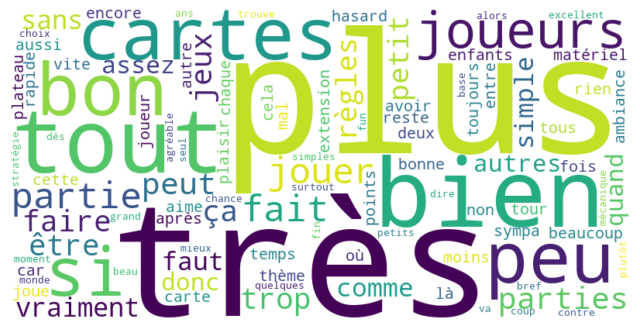

In [ ]:
# Somme des occurrences des mots
word_freq = np.asarray(X_clean.sum(axis=0)).flatten()
vocab = vectorizer.get_feature_names_out()

# Trier par fréquence décroissante
sorted_indices = np.argsort(word_freq)[::-1]
top_100_words = {vocab[i]: word_freq[i] for i in sorted_indices[:100]}
print(top_100_words)

# Afficher le word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(top_100_words)
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

{'plus': 67504, 'bien': 56920, 'très': 55379, 'tout': 51074, 'peu': 42335, 'bon': 40652, 'si': 39830, 'fait': 37260, 'joueurs': 35762, 'cartes': 35649, 'peut': 35590, 'partie': 35186, 'jouer': 34257, 'parties': 33481, 'faire': 32278, 'être': 30662, 'jeux': 28328, 'ça': 27741, 'règles': 27612, 'sans': 27396, 'comme': 26583, 'trop': 25973, 'faut': 25425, 'donc': 24271, 'vraiment': 23988, 'autres': 23680, 'petit': 23103, 'quand': 21803, 'matériel': 21708, 'aussi': 21594, 'assez': 21477, 'simple': 21394, 'car': 21328, 'moins': 20473, 'beaucoup': 20190, 'deux': 19090, 'cette': 18614, 'fois': 18430, 'avoir': 18219, 'temps': 18045, 'thème': 17754, 'entre': 17325, 'bonne': 17296, 'là': 16857, 'où': 16438, 'tous': 16277, 'encore': 16102, 'cela': 16018, 'joueur': 15597, 'autre': 15572, 'chaque': 15404, 'plateau': 15378, 'après': 15341, 'toujours': 15035, 'alors': 15033, 'bref': 15027, 'plaisir': 14946, 'non': 14771, 'rien': 14730, 'points': 14700, 'tour': 14575, 'reste': 14424, 'quelques': 14203

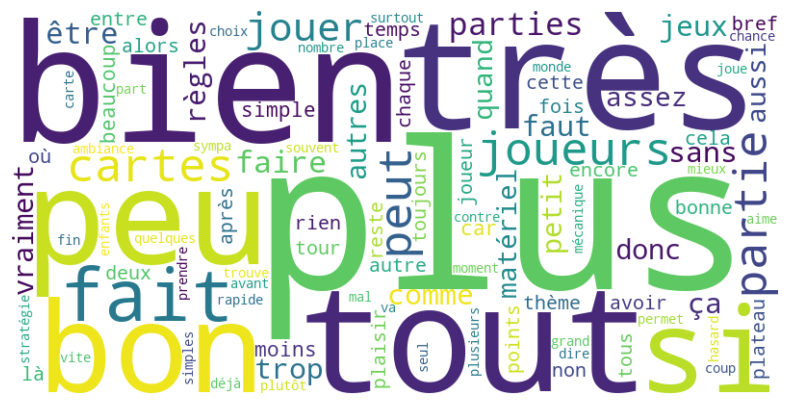

In [ ]:
# Nombre de documents contenant chaque mot
doc_freq = (X_clean > 0).sum(axis=0).A1  # A1 permet de convertir la matrice en un tableau NumPy plat (1D).
sorted_indices = np.argsort(doc_freq)[::-1]
top_100_doc_freq = {vocab[i]: doc_freq[i] for i in sorted_indices[:100]}
print(top_100_doc_freq)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(top_100_doc_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
vectorizer_pos = CountVectorizer(preprocessor=preprocess, stop_words=stop_words )
X_positif = vectorizer_pos.fit_transform(positifs)
dic_size = X_positif.shape[1]
print(dic_size)
print(vectorizer_pos.get_feature_names_out()[:10])

108371
['aaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhh'
 'aaaaaaaaaaaaaaaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhh'
 'aaaaaaaaaaaaaaaaaaaaaadore' 'aaaaaaaaaaaaaaaaaarg'
 'aaaaaaaaaaaaaaarrrgggggggghh' 'aaaaaaaaaaaaarrrrrrrrrrgggghhhh'
 'aaaaaaaaaaaah' 'aaaaaaaaaaah' 'aaaaaaaaaah' 'aaaaaaaaaahhh']


In [39]:
stop_words = set(stopwords.words("french")).union({"jeu"})

vectorizer_neg = CountVectorizer(preprocessor=preprocess, stop_words=list(stop_words) )
X_negatif = vectorizer_neg.fit_transform(negatifs)
dic_size_n = X_negatif.shape[1]
print(dic_size_n)
print(vectorizer_neg.get_feature_names_out()[:10])

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


{'plus': 81065, 'très': 64925, 'bien': 60651, 'tout': 52044, 'cartes': 40122, 'si': 36110, 'joueurs': 35986, 'peu': 35348, 'bon': 34921, 'partie': 32861, 'fait': 31318, 'peut': 31204, 'parties': 28260, 'jouer': 28159, 'faire': 27679, 'être': 24883, 'ça': 24846, 'jeux': 24571, 'règles': 23155, 'comme': 21794, 'faut': 21781, 'sans': 20467, 'vraiment': 19865, 'aussi': 19147, 'donc': 18958, 'autres': 18868, 'petit': 17832, 'car': 17303, 'deux': 17277, 'trop': 17075, 'simple': 16731, 'quand': 16560, 'cette': 15954, 'assez': 15814, 'beaucoup': 15410, 'matériel': 15318, 'moins': 15211, 'chaque': 15164, 'fois': 14335, 'joueur': 14284, 'temps': 14186, 'points': 14104, 'avoir': 13779, 'entre': 13496, 'tous': 13319, 'bonne': 13195, 'thème': 13077, 'où': 13073, 'plateau': 12992, 'tour': 12946, 'encore': 12918, 'là': 12483, 'cela': 12276, 'plaisir': 12222, 'toujours': 12115, 'carte': 11902, 'autre': 11360, 'après': 11091, 'alors': 10665, 'choix': 10404, 'bref': 10341, 'joue': 10258, 'extension': 10

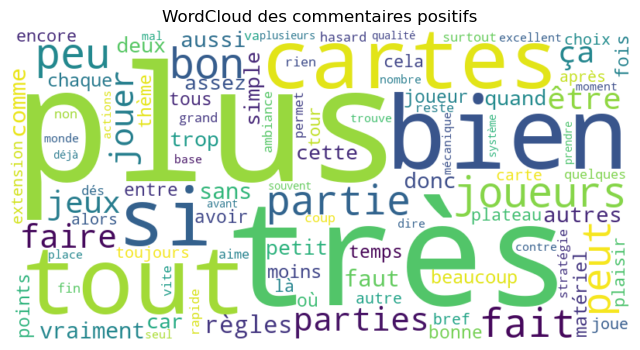

In [ ]:
# word cloud des mots positifs
word_freq_pos = np.asarray(X_positif.sum(axis=0)).flatten()
vocab_pos = vectorizer_pos.get_feature_names_out()

# Trier par fréquence décroissante
sorted_indices = np.argsort(word_freq_pos)[::-1]
top_100_words_pos = {vocab_pos[i]: word_freq_pos[i] for i in sorted_indices[:100]}
print(top_100_words_pos)

# Afficher le word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(top_100_words_pos)
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("WordCloud des commentaires positifs")
plt.axis("off")
plt.show()

{'plus': 46855, 'bien': 30575, 'très': 27274, 'tout': 26569, 'peu': 25763, 'cartes': 25125, 'si': 22624, 'fait': 19884, 'peut': 19044, 'partie': 18681, 'ça': 18044, 'joueurs': 17721, 'bon': 17161, 'trop': 17055, 'être': 16308, 'faire': 16029, 'jouer': 15311, 'parties': 14774, 'sans': 14006, 'jeux': 13496, 'donc': 13022, 'comme': 12382, 'assez': 11951, 'règles': 11824, 'autres': 11352, 'vraiment': 11296, 'quand': 11070, 'faut': 10453, 'moins': 10368, 'petit': 10064, 'temps': 9854, 'car': 9838, 'beaucoup': 9008, 'matériel': 8797, 'deux': 8773, 'là': 8369, 'thème': 8367, 'avoir': 8311, 'cela': 7966, 'rien': 7939, 'aussi': 7937, 'fois': 7837, 'cette': 7771, 'où': 7664, 'non': 7578, 'alors': 7576, 'joueur': 7563, 'reste': 7477, 'simple': 7449, 'autre': 7356, 'tour': 7243, 'vite': 7230, 'points': 7171, 'mal': 7127, 'carte': 6975, 'hasard': 6886, 'après': 6766, 'entre': 6762, 'plateau': 6737, 'sympa': 6653, 'quelques': 6537, 'encore': 6488, 'dés': 6396, 'bonne': 6387, 'tous': 6002, 'bref': 57

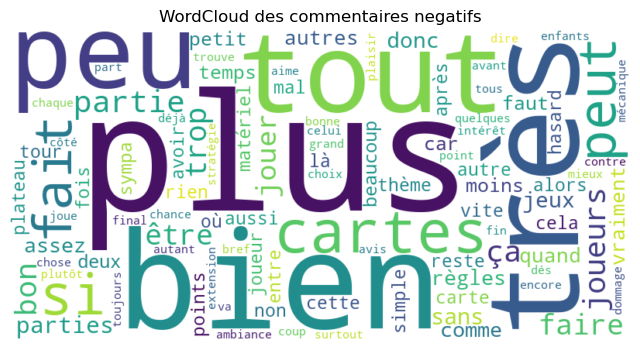

In [ ]:
# word cloud des mots negatifs
word_freq_neg = np.asarray(X_negatif.sum(axis=0)).flatten()
vocab_neg = vectorizer_neg.get_feature_names_out()

# Trier par fréquence décroissante
sorted_indices = np.argsort(word_freq_neg)[::-1]
top_100_words_neg = {vocab_neg[i]: word_freq_neg[i] for i in sorted_indices[:100]}
print(top_100_words_neg)

# Afficher le word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(top_100_words_neg)
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("WordCloud des commentaires negatifs")
plt.axis("off")
plt.show()

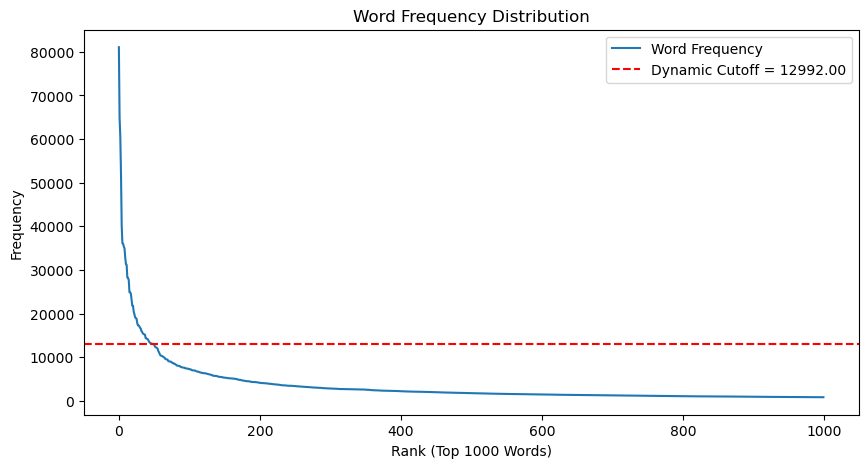

[('plus', 81065), ('très', 64925), ('bien', 60651), ('tout', 52044), ('cartes', 40122), ('si', 36110), ('joueurs', 35986), ('peu', 35348), ('bon', 34921), ('partie', 32861), ('fait', 31318), ('peut', 31204), ('parties', 28260), ('jouer', 28159), ('faire', 27679), ('être', 24883), ('ça', 24846), ('jeux', 24571), ('règles', 23155), ('comme', 21794), ('faut', 21781), ('sans', 20467), ('vraiment', 19865), ('aussi', 19147), ('donc', 18958), ('autres', 18868), ('petit', 17832), ('car', 17303), ('deux', 17277), ('trop', 17075), ('simple', 16731), ('quand', 16560), ('cette', 15954), ('assez', 15814), ('beaucoup', 15410), ('matériel', 15318), ('moins', 15211), ('chaque', 15164), ('fois', 14335), ('joueur', 14284), ('temps', 14186), ('points', 14104), ('avoir', 13779), ('entre', 13496), ('tous', 13319), ('bonne', 13195), ('thème', 13077), ('où', 13073), ('plateau', 12992), ('tour', 12946), ('encore', 12918), ('là', 12483), ('cela', 12276), ('plaisir', 12222), ('toujours', 12115), ('carte', 11902

In [ ]:
#!pip install kneed
from kneed import KneeLocator

word_freq_pos = np.asarray(X_positif.sum(axis=0)).flatten()
vocab_pos = vectorizer_pos.get_feature_names_out()

# Construire le Counter à partir des fréquences de X_positif
wcp = Counter(dict(zip(vocab_pos, word_freq_pos)))

freq = [f for w,f in wcp.most_common(1000)]

x = list(range(1, len(freq) + 1))
kneedle = KneeLocator(x, freq, curve='convex', direction='decreasing')
elbow_point = kneedle.knee
cutoff_frequency = freq[elbow_point - 1]

# Plot the word frequencies
plt.figure(figsize=(10, 5))
plt.plot(freq[:1000], label="Word Frequency")
plt.axhline(y=cutoff_frequency, color='r', linestyle='--', label=f"Dynamic Cutoff = {cutoff_frequency:.2f}")

# Add labels and legend
plt.title("Word Frequency Distribution")
plt.xlabel("Rank (Top 1000 Words)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

print(wcp.most_common(100))

filtered_positifs_clean = [(word, count) for word, count in wcp.items() if count <= cutoff_frequency]


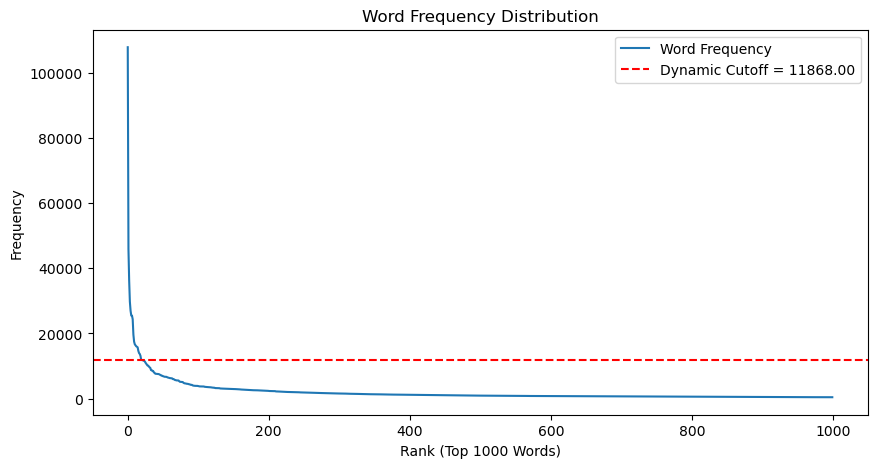

[('jeu', 107805), ('plus', 45873), ("c'est", 36197), ('bien', 29730), ('très', 26976), ('peu', 25481), ('tout', 25465), ('cartes', 24372), ('fait', 19645), ('partie', 17488), ('trop', 16685), ('joueurs', 16401), ('bon', 16077), ('peut', 15928), ('faire', 15771), ('jouer', 14681), ('parties', 13998), ('sans', 13730), ('jeux', 13172), ('comme', 11978), ("j'ai", 11868), ('assez', 11787), ('donc', 11779), ("n'est", 11603), ('règles', 11521), ('vraiment', 11095), ('quand', 10792), ('être', 10461), ('faut', 10179), ('moins', 10142), ('petit', 9843), ('car', 9617), ('temps', 9442), ('beaucoup', 8761), ("qu'il", 8756), ('matériel', 8509), ('deux', 8506), ('thème', 8058), ('', 7946), ('aussi', 7662), ("d'un", 7642), ('fois', 7632), ('autres', 7623), ('cela', 7559), ('cette', 7545), ('rien', 7441), ('joueur', 7312), ('reste', 7165), ('simple', 7145), ('vite', 6949), ('mal', 6923), ('tour', 6828), ('carte', 6740), ('non', 6717), ('alors', 6710), ('points', 6696), ('hasard', 6568), ("qu'on", 6481)

In [ ]:
#!pip install kneed
from kneed import KneeLocator

word_freq_neg = np.asarray(X_negatif.sum(axis=0)).flatten()
vocab_neg = vectorizer_neg.get_feature_names_out()

# Construire le Counter à partir des fréquences de X_positif
wcp = Counter(dict(zip(vocab_neg, word_freq_neg)))

freq = [f for w,f in wcn.most_common(1000)]

x = list(range(1, len(freq) + 1))
kneedle = KneeLocator(x, freq, curve='convex', direction='decreasing')
elbow_point = kneedle.knee
cutoff_frequency = freq[elbow_point - 1]

# Plot the word frequencies
plt.figure(figsize=(10, 5))
plt.plot(freq[:1000], label="Word Frequency")
plt.axhline(y=cutoff_frequency, color='r', linestyle='--', label=f"Dynamic Cutoff = {cutoff_frequency:.2f}")

# Add labels and legend
plt.title("Word Frequency Distribution")
plt.xlabel("Rank (Top 1000 Words)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
print(wcn.most_common(100))
filtered_negatifs_clean = [(word, count) for word, count in wcn.items() if count <= cutoff_frequency]


In [ ]:
print(filtered_positifs_clean[:20])
print("="*140)
print(filtered_negatifs_clean[:20])

[('aaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhh', 1), ('aaaaaaaaaaaaaaaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhh', 1), ('aaaaaaaaaaaaaaaaaaaaaadore', 1), ('aaaaaaaaaaaaaaaaaarg', 1), ('aaaaaaaaaaaaaaarrrgggggggghh', 1), ('aaaaaaaaaaaaarrrrrrrrrrgggghhhh', 1), ('aaaaaaaaaaaah', 1), ('aaaaaaaaaaah', 1), ('aaaaaaaaaah', 1), ('aaaaaaaaaahhh', 1), ('aaaaaaaaaahhhhhh', 1), ('aaaaaaaaahhhhhhhhh', 1), ('aaaaaaaaarrrrrg', 1), ('aaaaaaaaarrrrrrrrrrrrrrrgggggggggggghhhhh', 1), ('aaaaaaah', 1), ('aaaaaaahhh', 1), ('aaaaaaahhhh', 1), ('aaaaaaahhhhhhhhh', 1), ('aaaaaaarh', 1), ('aaaaaah', 5)]
[('comment', 1582), ('continuer', 248), ('après', 5722), ('mega', 25), ('hit', 87), ('simplement', 1242), ('oiseaux', 30), ('papillons', 45), ('principe', 3570), ('pourrait', 1370), ('être', 10461), ('qualifié', 16), ('familial', 1785), ('avancer', 628), ('carte', 6740), ('pays', 297), ('atterrir', 8), ('fleurs', 61), ('collectionner', 225), ('afin', 1128)]


In [ ]:
commonwords=set()
cpt=0
for w in filtered_positifs_clean[:1000]:
    if w in filtered_negatifs_clean[:1000]:
        commonwords.add(w)
        cpt+=1

print(commonwords)
print(cpt)#checking if their is overlapp between the 2

set()
0


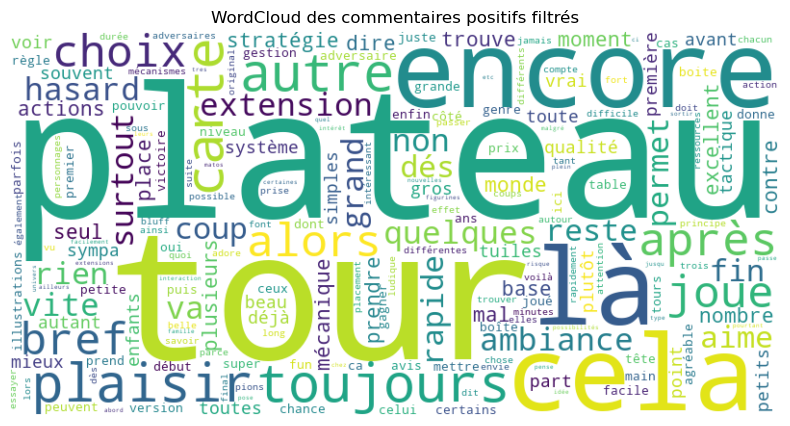

In [ ]:
word_freq_dict = dict(filtered_positifs_clean)

# Générer le WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq_dict)

# Afficher le WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud des commentaires positifs filtrés")
plt.show()

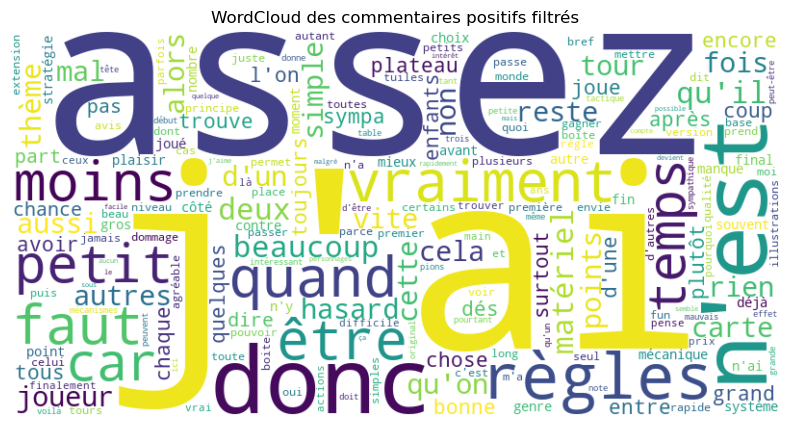

In [ ]:
word_freq_dict = dict(filtered_negatifs_clean)

# Générer le WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq_dict)

# Afficher le WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud des commentaires positifs filtrés")
plt.show()

In [46]:
print(len(comments_of_neighbors))

27


In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [47]:
stop_words = set(stopwords.words("french")).union({"jeu"})

vectorizer = TfidfVectorizer(preprocessor= preprocess, stop_words=list(stop_words))  # On enlève les stopwords anglais, ajustez selon la langue
tfidf_matrix = vectorizer.fit_transform(comments_of_neighbors)

# Afficher la forme de la matrice TF-IDF
print(f"Forme de la matrice TF-IDF : {tfidf_matrix.shape}")

Forme de la matrice TF-IDF : (27, 1437)


In [48]:
import numpy as np

# Somme des poids TF-IDF pour chaque mot (colonne)
word_sums = tfidf_matrix.sum(axis=0)

# Récupérer les noms des termes
terms = vectorizer.get_feature_names_out()

# Associer chaque mot avec sa somme TF-IDF
word_freq = [(terms[i], word_sums[0, i]) for i in range(len(terms))]

# Trier par fréquence décroissante
word_freq_sorted = sorted(word_freq, key=lambda x: x[1], reverse=True)

# Afficher les 20 mots les plus fréquents avec leurs "fréquences" pondérées TF-IDF
print("Mots les plus fréquents (TF-IDF) :")
for word, freq in word_freq_sorted[:20]:
    print(f"{word}: {freq:.2f}")


Mots les plus fréquents (TF-IDF) :
plus: 1.09
tout: 1.04
si: 1.03
peut: 0.93
jeux: 0.80
donc: 0.79
jouer: 0.77
très: 0.75
simple: 0.75
splendor: 0.75
bien: 0.71
faire: 0.68
ça: 0.64
peu: 0.64
cartes: 0.63
merci: 0.62
encore: 0.60
où: 0.60
comme: 0.59
cette: 0.56


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


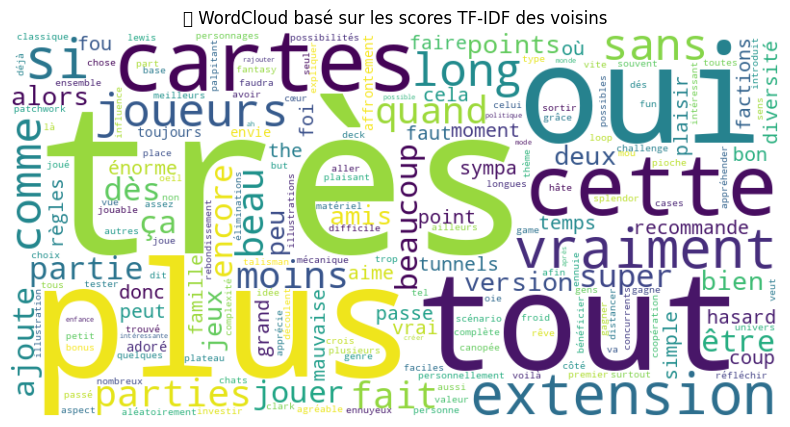

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Associer les mots à leur poids total TF-IDF
tfidf_scores = tfidf_matrix.sum(axis=0).A1
terms = vectorizer.get_feature_names_out()
tfidf_dict = {terms[i]: tfidf_scores[i] for i in range(len(terms))}

# Générer le WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_dict)

# Afficher le WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud basé sur les scores TF-IDF des voisins")
plt.show()

In [49]:
pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 7.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.0 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.24.0 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.24.0 which is incompatible.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.24.0 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.0 which is incompatible.
al

In [51]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [71]:
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words("french")).union("jeu")

# Application sur les commentaires
textss = [preprocess(comment) for comment in comments_of_neighbors if isinstance(comment, str)]

texts = [
    [word for word in word_tokenize(comment.lower()) if word not in stop_words and word.isalpha() and len(word) > 2]
    for comment in textss
]



In [72]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


lda_model = gensim.models.LdaModel(
    corpus,
    num_topics=5,  # nombre de topics
    id2word=dictionary,
    passes=10,
    random_state=42
)


In [73]:
for i, topic in lda_model.print_topics(num_words=10):
    print(f"🔹 Topic {i}: {topic}")


🔹 Topic 0: 0.025*"jeu" + 0.015*"plus" + 0.008*"ham" + 0.008*"spider" + 0.008*"marvel" + 0.007*"donc" + 0.007*"peut" + 0.007*"splendor" + 0.006*"jouer" + 0.006*"héros"
🔹 Topic 1: 0.015*"joueuse" + 0.013*"tuiles" + 0.008*"partie" + 0.008*"points" + 0.008*"paysages" + 0.008*"paysage" + 0.008*"ile" + 0.008*"nuage" + 0.008*"énergie" + 0.008*"montgolfière"
🔹 Topic 2: 0.009*"jeu" + 0.006*"propose" + 0.006*"vin" + 0.006*"trek" + 0.004*"plus" + 0.004*"thème" + 0.004*"sans" + 0.004*"https" + 0.004*"avis" + 0.003*"fait"
🔹 Topic 3: 0.011*"jeu" + 0.009*"cartes" + 0.009*"non" + 0.009*"papillons" + 0.007*"bien" + 0.005*"tout" + 0.005*"comme" + 0.005*"faire" + 0.005*"déplacement" + 0.005*"poétique"
🔹 Topic 4: 0.034*"jeu" + 0.008*"tout" + 0.007*"plus" + 0.006*"très" + 0.006*"encore" + 0.006*"cette" + 0.005*"comme" + 0.005*"faut" + 0.005*"être" + 0.005*"allez"
